In [2]:
getwd()

[1] "/home/jovyan/work/20200522_Regression_OLS_ML"

In [3]:
rm(list=ls())
setwd("home/jovyan/work")

ERROR: Error in setwd("home/jovyan/work"): cannot change working directory


In [4]:
#データの読み込み
dt <- read.csv("gas_10k.csv",header=T)
dt
str(dt)
summary(dt)
dt[,6] <- dt[,6]/1000  ## displacement unit to "litter"
dt[,7] <- dt[,7]/1000  ## weight unit to "ton"

#3~11列目の切り出し
x <- dt[,3:11]

#グラフィックパラメーター  作図する前に『作図していいですか？』と質問するようにする
par(ask=T)

#pairs(x)

year,month,mileage,daily_km,hybrid,displace_cc,weight_kg,age_month,temp_ave,gasprice,pop_density
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
2006,10,17.44,19.0,0,650,1090,12,8.9,141.30,65
2006,10,8.97,14.3,0,650,1220,79,14.6,145.42,158
2006,10,16.22,16.1,0,650,1060,15,17.2,140.94,186
2006,10,14.42,24.8,0,650,1000,5,20.6,140.74,1027
2006,10,13.99,24.2,0,650,890,107,20.1,142.42,338
2006,10,12.95,14.4,0,650,1050,29,18.4,143.48,105
2006,10,11.50,14.6,0,650,1130,65,12.6,141.30,65
2006,10,1.54,2.3,0,650,1080,35,19.7,139.92,322
2006,10,10.60,12.7,0,650,1070,19,20.2,143.26,251


'data.frame':	10000 obs. of  11 variables:
 $ year       : int  2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ month      : int  10 10 10 10 10 10 10 10 10 10 ...
 $ mileage    : num  17.44 8.97 16.22 14.42 13.99 ...
 $ daily_km   : num  19 14.3 16.1 24.8 24.2 14.4 14.6 2.3 12.7 20.4 ...
 $ hybrid     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ displace_cc: int  650 650 650 650 650 650 650 650 650 650 ...
 $ weight_kg  : int  1090 1220 1060 1000 890 1050 1130 1080 1070 1040 ...
 $ age_month  : int  12 79 15 5 107 29 65 35 19 39 ...
 $ temp_ave   : num  8.9 14.6 17.2 20.6 20.1 18.4 12.6 19.7 20.2 21.2 ...
 $ gasprice   : num  141 145 141 141 142 ...
 $ pop_density: int  65 158 186 1027 338 105 65 322 251 245 ...


      year          month           mileage         daily_km     
 Min.   :2006   Min.   : 1.000   Min.   : 0.07   Min.   :  1.00  
 1st Qu.:2009   1st Qu.: 3.000   1st Qu.: 9.32   1st Qu.: 13.99  
 Median :2012   Median : 7.000   Median :12.11   Median : 23.20  
 Mean   :2011   Mean   : 6.515   Mean   :12.99   Mean   : 30.58  
 3rd Qu.:2014   3rd Qu.:10.000   3rd Qu.:15.90   3rd Qu.: 37.10  
 Max.   :2016   Max.   :12.000   Max.   :49.82   Max.   :456.20  
     hybrid        displace_cc     weight_kg      age_month     
 Min.   :0.0000   Min.   : 590   Min.   : 810   Min.   :  3.00  
 1st Qu.:0.0000   1st Qu.:1290   1st Qu.:1265   1st Qu.: 28.00  
 Median :0.0000   Median :1490   Median :1485   Median : 60.00  
 Mean   :0.2613   Mean   :1586   Mean   :1517   Mean   : 69.85  
 3rd Qu.:1.0000   3rd Qu.:1990   3rd Qu.:1725   3rd Qu.:103.00  
 Max.   :1.0000   Max.   :5980   Max.   :3310   Max.   :240.00  
    temp_ave         gasprice      pop_density    
 Min.   :-10.00   Min.   :100.9 

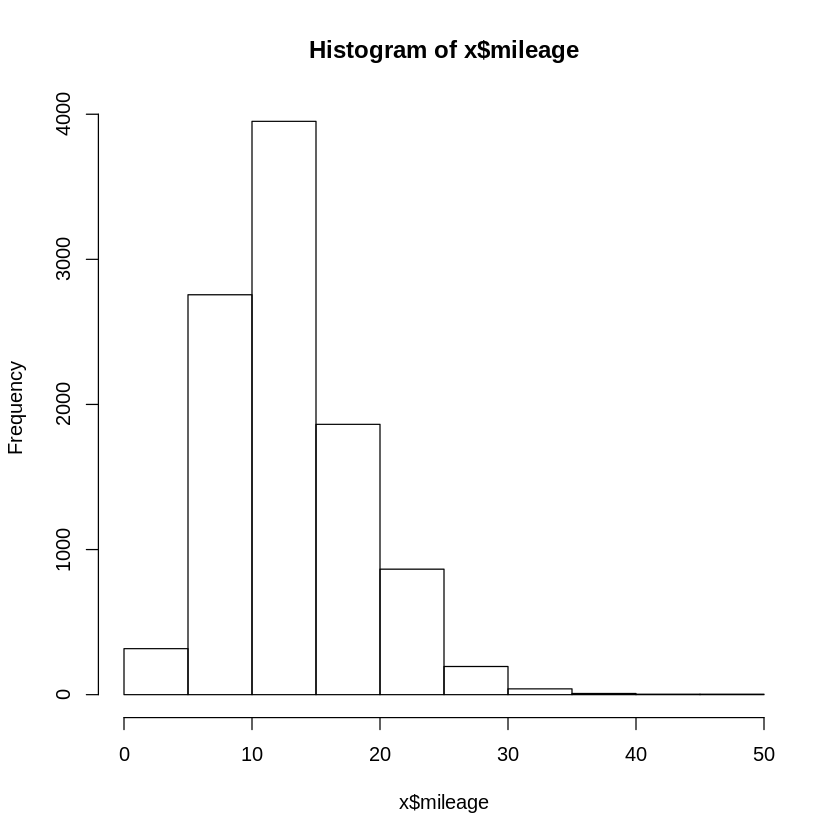

In [65]:
hist(x$mileage)

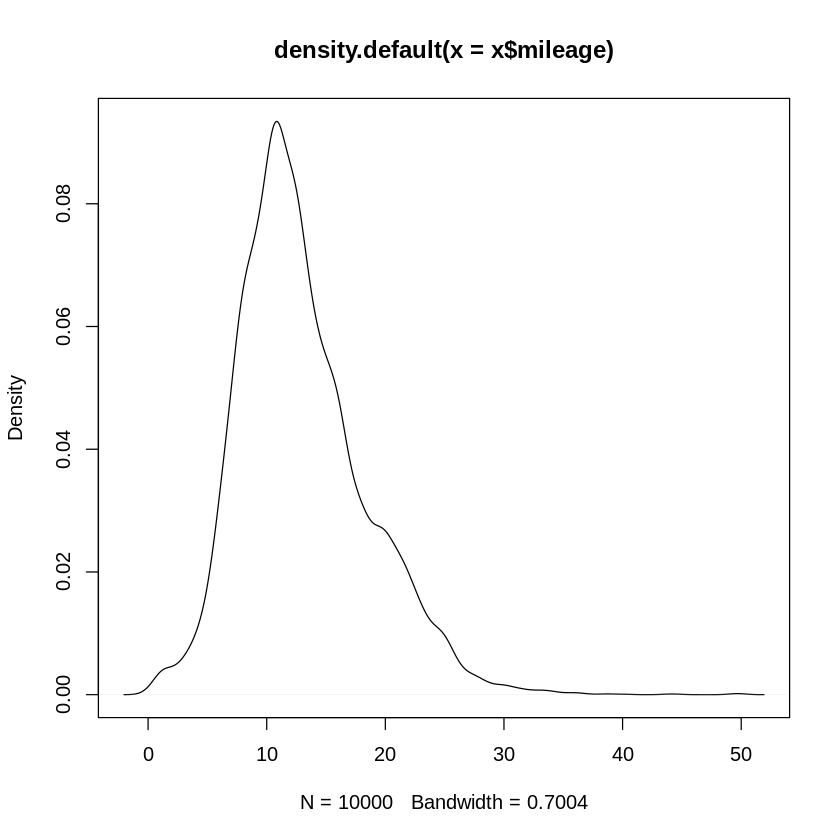

In [66]:
plot(density(x$mileage))

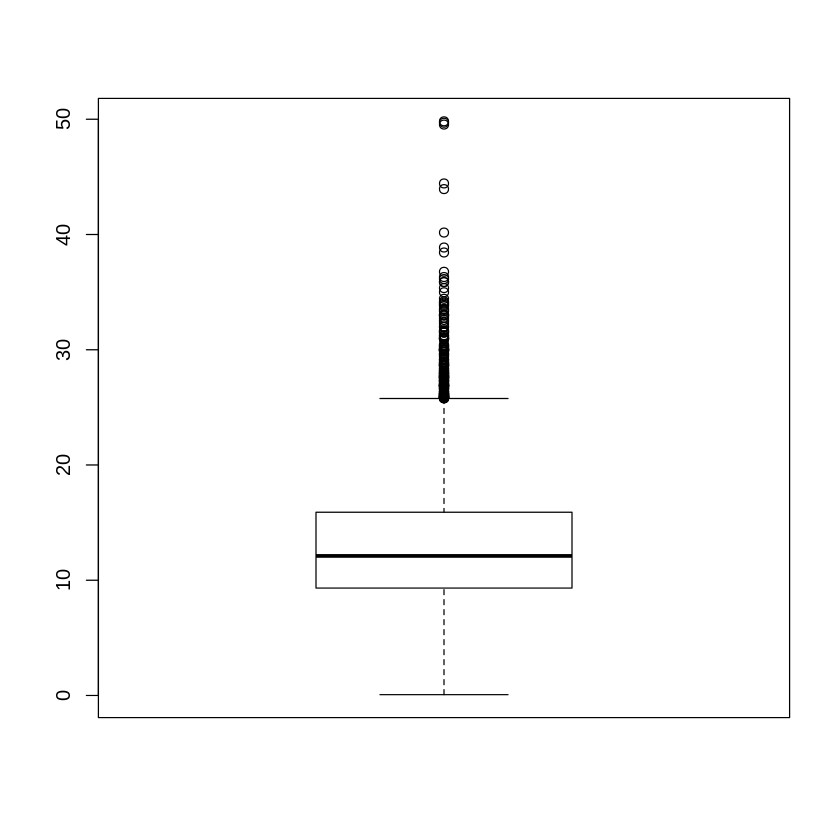

In [67]:
boxplot(x$mileage)

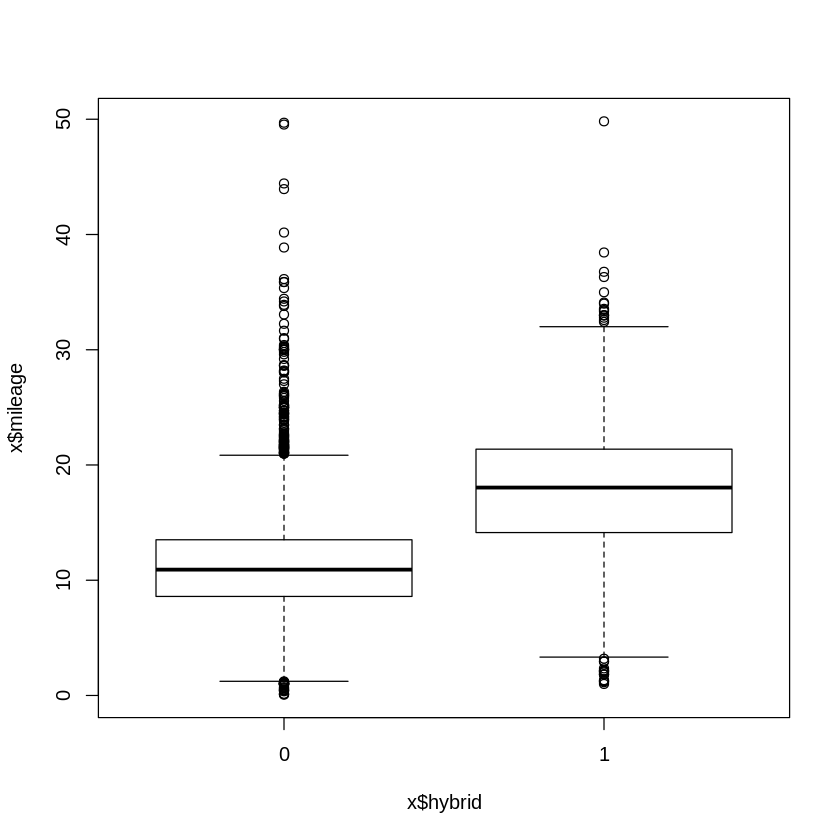

In [68]:
boxplot(x$mileage~x$hybrid)

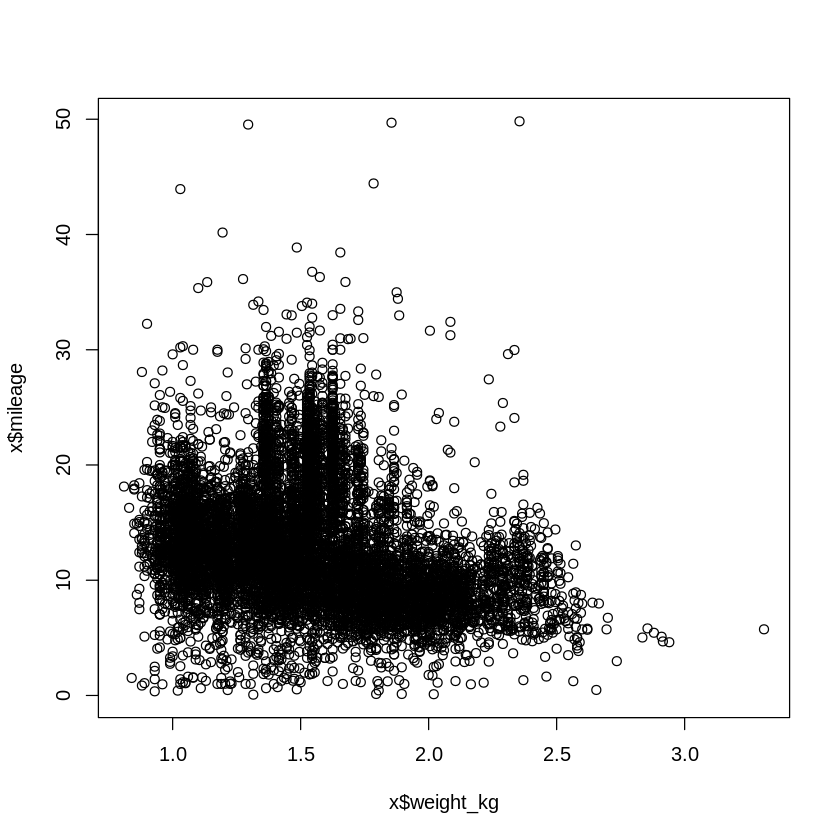

In [69]:
plot(x$weight_kg,x$mileage)

In [70]:
#cor(x) : correlation coefficient
round(cor(x),digits=3)

,mileage,daily_km,hybrid,displace_cc,weight_kg,age_month,temp_ave,gasprice,pop_density
mileage,1.000,0.233,0.530,-0.288,-0.251,-0.343,0.079,0.051,-0.043
daily_km,0.233,1.000,0.132,0.090,0.116,-0.116,0.028,0.004,-0.042
hybrid,0.530,0.132,1.000,0.140,0.231,-0.388,0.002,0.037,0.062
displace_cc,-0.288,0.090,0.140,1.000,0.878,0.066,0.003,-0.013,0.062
weight_kg,-0.251,0.116,0.231,0.878,1.000,-0.052,-0.003,-0.007,0.061
age_month,-0.343,-0.116,-0.388,0.066,-0.052,1.000,-0.033,-0.026,-0.041
temp_ave,0.079,0.028,0.002,0.003,-0.003,-0.033,1.000,0.255,0.117
gasprice,0.051,0.004,0.037,-0.013,-0.007,-0.026,0.255,1.000,0.008
pop_density,-0.043,-0.042,0.062,0.062,0.061,-0.041,0.117,0.008,1.000


In [71]:
#result <- lm(y ~ x, data)　の形らしい

In [72]:
#特にひねりなし 独立変数の線形
res1 <- lm(x$mileage~.,data=x)

logLik(res1) #log-Likelihood

summary(res1)

'log Lik.' -27560.88 (df=10)


Call:
lm(formula = x$mileage ~ ., data = x)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.400  -1.919  -0.061   1.885  41.407 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.890e+01  4.126e-01  45.819  < 2e-16 ***
daily_km     3.330e-02  1.284e-03  25.939  < 2e-16 ***
hybrid       6.682e+00  9.721e-02  68.745  < 2e-16 ***
displace_cc -5.886e-01  1.205e-01  -4.884 1.05e-06 ***
weight_kg   -4.992e+00  2.297e-01 -21.732  < 2e-16 ***
age_month   -1.310e-02  8.659e-04 -15.126  < 2e-16 ***
temp_ave     4.627e-02  4.662e-03   9.926  < 2e-16 ***
gasprice     1.693e-03  2.492e-03   0.679    0.497    
pop_density -2.442e-04  3.069e-05  -7.959 1.92e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.81 on 9991 degrees of freedom
Multiple R-squared:  0.491,	Adjusted R-squared:  0.4906 
F-statistic:  1205 on 8 and 9991 DF,  p-value: < 2.2e-16


In [74]:
#独立変数の１つまたは2つの組み合わせ
res2 <- lm(x$mileage~(x$daily_km + x$hybrid + x$displace_cc +
           x$weight_kg + x$age_month+ x$temp_ave +
         x$gasprice + x$pop_density)^2)

summary(res2)


Call:
lm(formula = x$mileage ~ (x$daily_km + x$hybrid + x$displace_cc + 
    x$weight_kg + x$age_month + x$temp_ave + x$gasprice + x$pop_density)^2)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.442  -1.812  -0.066   1.797  41.128 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.775e+01  2.139e+00   8.301  < 2e-16 ***
x$daily_km                   7.373e-02  1.365e-02   5.402 6.75e-08 ***
x$hybrid                     1.282e+01  1.042e+00  12.309  < 2e-16 ***
x$displace_cc               -4.570e-01  1.116e+00  -0.409 0.682210    
x$weight_kg                 -4.647e+00  2.129e+00  -2.183 0.029032 *  
x$age_month                 -3.212e-02  8.837e-03  -3.634 0.000280 ***
x$temp_ave                   1.563e-01  4.832e-02   3.234 0.001224 ** 
x$gasprice                  -4.268e-03  1.469e-02  -0.290 0.771495    
x$pop_density               -8.020e-04  3.300e-04  -2.430 0.015110 *  
x$daily_km:x$hybrid         -3.

In [75]:
#milageの値との相関係数が大きい独立変数のみ + 独立変数の１つまたは2つの組み合わせ
res3 <- lm(x$mileage~(x$daily_km + x$hybrid + x$displace_cc +
           x$weight_kg + x$age_month)^2)

summary(res3)


Call:
lm(formula = x$mileage ~ (x$daily_km + x$hybrid + x$displace_cc + 
    x$weight_kg + x$age_month)^2)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.622  -1.855  -0.072   1.844  40.913 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.789e+01  5.390e-01  33.202  < 2e-16 ***
x$daily_km                 8.794e-02  6.782e-03  12.967  < 2e-16 ***
x$hybrid                   1.227e+01  5.801e-01  21.145  < 2e-16 ***
x$displace_cc             -8.070e-01  3.612e-01  -2.234  0.02549 *  
x$weight_kg               -3.877e+00  5.563e-01  -6.969 3.40e-12 ***
x$age_month               -2.284e-02  4.266e-03  -5.354 8.78e-08 ***
x$daily_km:x$hybrid       -2.109e-03  3.053e-03  -0.691  0.48966    
x$daily_km:x$displace_cc  -1.209e-02  3.681e-03  -3.286  0.00102 ** 
x$daily_km:x$weight_kg    -2.193e-02  6.688e-03  -3.279  0.00104 ** 
x$daily_km:x$age_month     6.422e-05  2.761e-05   2.326  0.02004 *  
x$hybrid:x$displace_cc  

In [6]:
#ダミー変数の列を加える(weightがある値以上が未満か)
weights<-(dt$weight_kg<1.8)*1+(dt$weight_kg>=1.8)*0
dt1<-cbind(dt,weights)
 y <- dt1[,3:12]
y

res4 <- lm(y$mileage~(y$daily_km + y$hybrid + y$displace_cc +
+                           y$weights + y$age_month +y$temp_ave +
+                           y$gasprice + y$pop_density))

summary(res4)

mileage,daily_km,hybrid,displace_cc,weight_kg,age_month,temp_ave,gasprice,pop_density,weights
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>
17.44,19.0,0,0.65,1.090,12,8.9,141.30,65,1
8.97,14.3,0,0.65,1.220,79,14.6,145.42,158,1
16.22,16.1,0,0.65,1.060,15,17.2,140.94,186,1
14.42,24.8,0,0.65,1.000,5,20.6,140.74,1027,1
13.99,24.2,0,0.65,0.890,107,20.1,142.42,338,1
12.95,14.4,0,0.65,1.050,29,18.4,143.48,105,1
11.50,14.6,0,0.65,1.130,65,12.6,141.30,65,1
1.54,2.3,0,0.65,1.080,35,19.7,139.92,322,1
10.60,12.7,0,0.65,1.070,19,20.2,143.26,251,1



Call:
lm(formula = y$mileage ~ (y$daily_km + y$hybrid + y$displace_cc + 
    +y$weights + y$age_month + y$temp_ave + +y$gasprice + y$pop_density))

Residuals:
    Min      1Q  Median      3Q     Max 
-20.173  -2.032  -0.093   1.944  42.555 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.200e+01  4.116e-01  29.163  < 2e-16 ***
y$daily_km     3.224e-02  1.295e-03  24.897  < 2e-16 ***
y$hybrid       6.101e+00  9.835e-02  62.035  < 2e-16 ***
y$displace_cc -2.041e+00  7.741e-02 -26.373  < 2e-16 ***
y$weights      2.116e+00  1.277e-01  16.564  < 2e-16 ***
y$age_month   -1.175e-02  8.689e-04 -13.526  < 2e-16 ***
y$temp_ave     4.685e-02  4.706e-03   9.955  < 2e-16 ***
y$gasprice     1.875e-03  2.516e-03   0.745    0.456    
y$pop_density -2.447e-04  3.098e-05  -7.897 3.15e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.846 on 9991 degrees of freedom
Multiple R-squared:  0.4812,	Adjusted R-squared

In [77]:
library(car)

ERROR: Error in library(car): there is no package called ‘car’


In [135]:
#Dividing parameters
##daily_km
t0 = 30.58
dk<-(dt$daily_km < t0)*0+(dt$daily_km >= t0)*1
dt5<-cbind(dt,dk)
##age_month
t1 = 69.85
am<-(dt$age_month < t1)*0+(dt$age_month >= t1)*1
dt5<-cbind(dt5,am)
##temp_ave
t2 = 14.77
ta<-(dt$temp_ave < t2)*0+(dt$temp_ave >= t2)*1
dt5<-cbind(dt5,ta)

x <- cbind(dt5[,0:2],dt5[,3:14])

res5 <- lm(x$mileage~(x$year + x$month + x$daily_km + x$hybrid + x$displace_cc +
           x$weight_kg + x$age_month+ x$temp_ave +
         x$gasprice + x$pop_density + x$dk + x$am + x$ta)^2)

summary(res5)


Call:
lm(formula = x$mileage ~ (x$year + x$month + x$daily_km + x$hybrid + 
    x$displace_cc + x$weight_kg + x$age_month + x$temp_ave + 
    x$gasprice + x$pop_density + x$dk + x$am + x$ta)^2)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.634  -1.751  -0.124   1.647  40.525 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -5.249e+02  2.916e+02  -1.800  0.07185 .  
x$year                       2.700e-01  1.450e-01   1.862  0.06259 .  
x$month                     -2.976e-01  8.049e+00  -0.037  0.97051    
x$daily_km                  -7.512e-01  1.229e+00  -0.611  0.54101    
x$hybrid                     2.308e+02  7.056e+01   3.272  0.00107 ** 
x$displace_cc               -3.444e+01  8.794e+01  -0.392  0.69534    
x$weight_kg                  5.043e+01  1.656e+02   0.305  0.76071    
x$age_month                  6.181e-01  1.058e+00   0.584  0.55921    
x$temp_ave                  -5.630e+00  6.847e+00  -0.822